<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%972.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ИДЗ 2. Вынужденные колебания материальной точки.
###Вариант 8 + 9.

Задание:
В начальный момент времени груз массой m1, прикрепленный к вязкоупругой подвеске (обобщающая схема динамической системы изображена на рис. 2.2, а), находится в покое в гравитационном поле. В начальный момент
времени t = 0 ему сообщается скорость v0, направленная вверх/вниз (см. варианты) и одновременно присоединяется масса m2 либо отсоединяется масса m3. Начальные возмущения вызывают колебательный процесс, который требуется описать и проанализировать.
Требуется:
- привести исходные данные анализируемой системы к эквивалентной
схеме (см. рис.2.1, рис. 2.2);
- направляя ось координат x вниз и выбирая начало отсчета в положении
равновесия колеблющегося груза, записать уравнение движения;
- сформулировать начальные условия для центра масс груза;
- построить частное решение задачи Коши; 
- построить амплитудно-частотную характеристику при номинальном
значении параметра вязкости µ, а также при значениях, отличающихся в десять раз в обе стороны, провести анализ и дать комментарии.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [21]:
#Вариант 8:
#Жёсткость пружины (Н/см)
c1 = 0.2
c2 = 0.25
c3 = 0.0

#Вариант 9:
#Масса груза (кг)
m1 = 3.0
m2 = 1.0
m3 = 0.0
#Коэффициент вязкости среды (кг/с)
mu = 1.2
#Скорость (м/с)
v0 = 1.0
#Направление - вверх
#Частота вынужденных колебаний (шт.)
omega = 12.0

g = 9.81
ksi0 = 0.07

In [34]:
#Так как расположение 1 и 2 пружин - параллельно, то:
c = c1 + c2
#пружины 1 и 2 по отношению к 3 располагаются последовательно, тогда:
#c = (c_eq * c3) / (c_eq + c3)
print("c = ", c)

#Аналогичным образом можно расчитать массу:
m = m1 + m2 + m3
print("m = ", m)

lambda_st = m * g / c
print("lambda_st = ", lambda_st)

b = mu / (2.0 * m)
print("b = ", b)

k = c / m
print("k = ", k)

a0 = (ksi0 * c) / m
print("a0 = ", a0)

c =  0.45
m =  4.0
lambda_st =  87.2
b =  0.15
k =  0.1125
a0 =  0.007875000000000002


In [41]:
print("Утверждение, что в системе низкий уровень вязкости: ", (b**2 - k**2) < 0)
#если true, то в системе происходят собственные колебания (низкий уровень вязкости)
#если false, то при высокой вязкости среды, собственное движение представляет собой апериодический процесс

Утверждение, что в системе низкий уровень вязкости:  False


In [35]:
delta = (k**2 - b**2)**2 + 4 * (b**2) * (omega**2)
print("delta = ", delta)

alpha = a0 * 2 * b * omega / delta
print("alpha = ", alpha)

beta = a0 * (k**2 - b**2) / delta
print("beta = ", beta)

delta =  12.960096899414062
alpha =  0.0021874836446077604
beta =  -5.981400590724344e-06


In [36]:
#Переменная
t = [i for i in range(0,101,1)]

In [37]:
A = a0 / math.sqrt(delta)

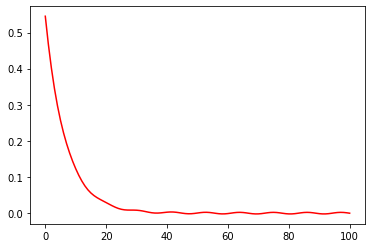

In [51]:
cc = 5
psi0 = 0.01
phi0 = 0.02
x_test = []

for i in t:
  x_test.append(cc * math.exp(-b*i) * math.sin(math.sqrt(abs(k**2 - b**2)) + psi0) + A * math.sin(omega * i + phi0))

plt.plot(t, x_test, color = "red")